## **Team Name: 5502_Group_8**
**Team Members:**
- **Kishore Dinakaran**
- **Sai Charan Rajoju**
- **Sai Sree**


## **Importing Libraries**

In [1]:

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **Dataset Upload, Labeling, and Preprocessing**

In [6]:

uploaded_files = files.upload()

data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

data_fake['class'] = 0
data_true['class'] = 1

data_fake_manual_testing = data_fake.tail(10)
data_true_manual_testing = data_true.tail(10)

data_fake = data_fake[:-10]
data_true = data_true[:-10]

cleaned_news_data = pd.concat([data_fake, data_true], axis=0)

cleaned_news_data = cleaned_news_data.drop(['title', 'subject', 'date'], axis=1)


Saving Fake.csv to Fake (3).csv
Saving True.csv to True (3).csv
Saving manual_testing.csv to manual_testing (3).csv


## **Text Preprocessing for News Data**

In [7]:
stopword_list = set(stopwords.words('english'))
text_lemmatizer = WordNetLemmatizer()

def preprocess_news_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', text)
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove very short words
    text = ' '.join(text_lemmatizer.lemmatize(word) for word in text.split() if word not in stopword_list)
    return text


cleaned_news_data['text'] = cleaned_news_data['text'].apply(preprocess_news_text)


## **Dataset Splitting and Text Vectorization**

In [9]:

features = cleaned_news_data['text']
labels = cleaned_news_data['class']

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=42)

text_vectorizer = TfidfVectorizer()
vectorized_train_features = text_vectorizer.fit_transform(features_train)
vectorized_test_features = text_vectorizer.transform(features_test)


## **Logistic Regression Model Training and Evaluation**

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5894
           1       0.99      0.99      0.99      5326

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



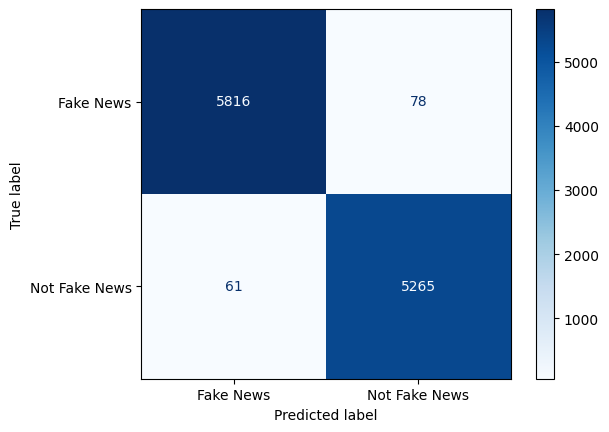

In [10]:

logistic_model = LogisticRegression()
logistic_model.fit(vectorized_train_features, labels_train)

logistic_predictions = logistic_model.predict(vectorized_test_features)
print("Logistic Regression Report:\n", classification_report(labels_test, logistic_predictions))

confusion_matrix_results = confusion_matrix(labels_test, logistic_predictions)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_results, display_labels=['Fake News', 'Not Fake News'])
confusion_matrix_display.plot(cmap=plt.cm.Blues)
plt.show()



## **Decision Tree Classifier Model Training and Evaluation**

Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5894
           1       1.00      1.00      1.00      5326

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



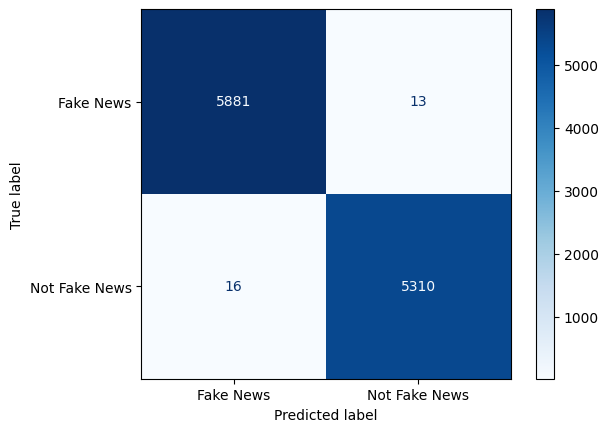

In [11]:

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(vectorized_train_features, labels_train)

decision_tree_predictions = decision_tree_model.predict(vectorized_test_features)
print("Decision Tree Report:\n", classification_report(labels_test, decision_tree_predictions))

confusion_matrix_values_dt = confusion_matrix(labels_test, decision_tree_predictions)
confusion_matrix_display_dt = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_values_dt, display_labels=['Fake News', 'Not Fake News'])
confusion_matrix_display_dt.plot(cmap=plt.cm.Blues)
plt.show()



## **Gradient Boosting Classifier Model Training and Evaluation**

Gradient Boosting Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5894
           1       0.99      1.00      1.00      5326

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



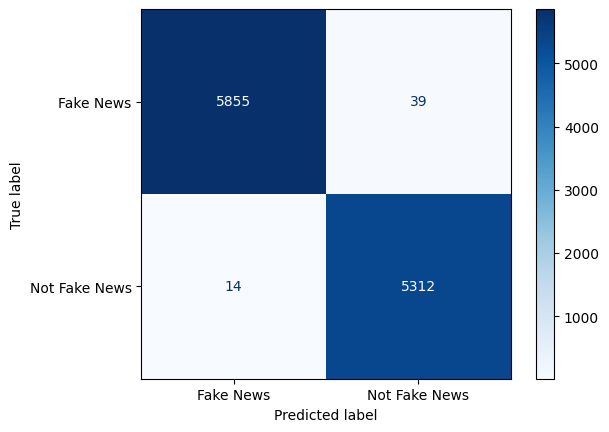

In [12]:

gradient_boosting_model = GradientBoostingClassifier(random_state=0)
gradient_boosting_model.fit(vectorized_train_features, labels_train)

gradient_boosting_predictions = gradient_boosting_model.predict(vectorized_test_features)
print("Gradient Boosting Report:\n", classification_report(labels_test, gradient_boosting_predictions))

confusion_matrix_values_gb = confusion_matrix(labels_test, gradient_boosting_predictions)
confusion_matrix_display_gb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_values_gb, display_labels=['Fake News', 'Not Fake News'])
confusion_matrix_display_gb.plot(cmap=plt.cm.Blues)
plt.show()



## **Random Forest Classifier Model Training and Evaluation**

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5894
           1       0.99      1.00      0.99      5326

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



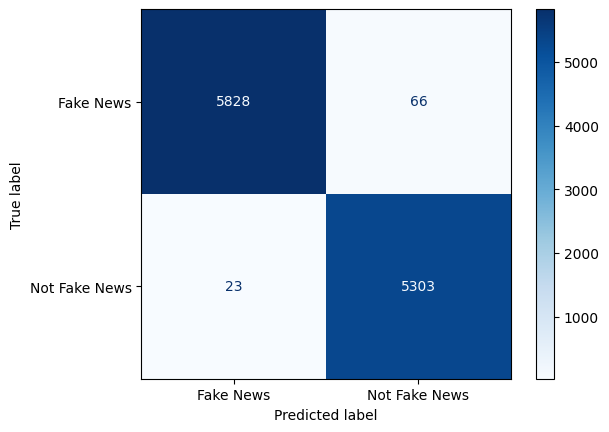

In [13]:

random_forest_model = RandomForestClassifier(random_state=0)
random_forest_model.fit(vectorized_train_features, labels_train)

random_forest_predictions = random_forest_model.predict(vectorized_test_features)
print("Random Forest Report:\n", classification_report(labels_test, random_forest_predictions))

confusion_matrix_values_rf = confusion_matrix(labels_test, random_forest_predictions)
confusion_matrix_display_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_values_rf, display_labels=['Fake News', 'Not Fake News'])
confusion_matrix_display_rf.plot(cmap=plt.cm.Blues)
plt.show()



## **Comparison of Model Performance**

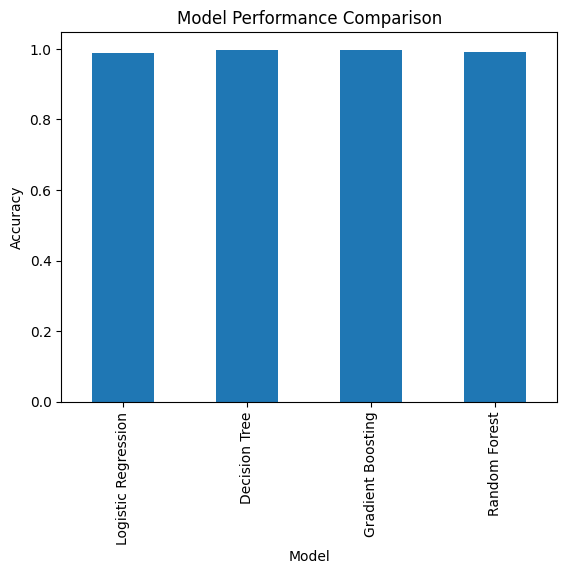

In [14]:

model_performance = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest'],
    'Accuracy': [
        logistic_model.score(vectorized_test_features, labels_test),
        decision_tree_model.score(vectorized_test_features, labels_test),
        gradient_boosting_model.score(vectorized_test_features, labels_test),
        random_forest_model.score(vectorized_test_features, labels_test)
    ]
}

performance_comparison_df = pd.DataFrame(model_performance)
performance_comparison_df.plot(kind='bar', x='Model', y='Accuracy', legend=False)
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()



## **Manual News Classification Testing**

In [15]:

def get_prediction_label(prediction):
    return "Fake News" if prediction == 0 else "Not A Fake News"

def test_news_manually(news_text):
    test_news = {"text": [news_text]}
    test_news_df = pd.DataFrame(test_news)
    test_news_df['text'] = test_news_df['text'].apply(preprocess_news_text)
    vectorized_test_news = text_vectorizer.transform(test_news_df['text'])

    prediction_lr = logistic_model.predict(vectorized_test_news)
    prediction_dt = decision_tree_model.predict(vectorized_test_news)
    prediction_gb = gradient_boosting_model.predict(vectorized_test_news)
    prediction_rf = random_forest_model.predict(vectorized_test_news)

    return print(f"\nLogistic Regression Prediction: {get_prediction_label(prediction_lr[0])}\n"
                 f"Decision Tree Prediction: {get_prediction_label(prediction_dt[0])}\n"
                 f"Gradient Boosting Prediction: {get_prediction_label(prediction_gb[0])}\n"
                 f"Random Forest Prediction: {get_prediction_label(prediction_rf[0])}")

news_input = input("Enter a news article: ")
test_news_manually(news_input)



Enter a news article: Sai Charan The Hero

Logistic Regression Prediction: Fake News
Decision Tree Prediction: Fake News
Gradient Boosting Prediction: Fake News
Random Forest Prediction: Fake News


## **Dataset Splitting with Stratification**

In [16]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.25, random_state=42, stratify=labels
)



## **Installing Streamlit**

In [19]:
!pip install streamlit


## **Saving Trained Models**

In [22]:

import joblib
joblib.dump(logistic_model, 'logistic_regression_model.pkl')  # Logistic Regression
joblib.dump(decision_tree_model, 'decision_tree_model.pkl')       # Decision Tree
joblib.dump(gradient_boosting_model, 'gradient_boosting_model.pkl')   # Gradient Boosting
joblib.dump(random_forest_model, 'random_forest_model.pkl')       # Random Forest

['random_forest_model.pkl']

## **Saving the Text Vectorizer**

In [24]:

joblib.dump(text_vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [25]:
import os
print(os.listdir())


['.config', 'random_forest_model.pkl', 'logistic_regression_model.pkl', 'Fake (1).csv', 'vectorizer.pkl', 'manual_testing (3).csv', 'manual_testing (1).csv', 'Fake (2).csv', 'True.csv', 'manual_testing (2).csv', 'True (2).csv', 'Fake (3).csv', 'Fake.csv', 'gradient_boosting_model.pkl', 'decision_tree_model.pkl', 'True (3).csv', 'manual_testing.csv', 'True (1).csv', 'sample_data']


## **Downloading Saved Models and Vectorizer**

In [26]:
from google.colab import files

files.download('logistic_regression_model.pkl')
files.download('decision_tree_model.pkl')
files.download('gradient_boosting_model.pkl')
files.download('random_forest_model.pkl')
files.download('vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Loading Saved Models and Vectorizer**

In [27]:
import joblib

lr_model = joblib.load('logistic_regression_model.pkl')
dt_model = joblib.load('decision_tree_model.pkl')
gb_model = joblib.load('gradient_boosting_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')

vectorizer = joblib.load('vectorizer.pkl')


## **Installing Streamlit and Pyngrok**

In [28]:
!pip install streamlit pyngrok


In [29]:
!ngrok config add-authtoken 2pcW8fqOjqI2S5ooHcGWBfAgwGx_7YpbVhtgsy2RJ1nMhDaGS


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


## **Streamlit Web App for Fake News Detection**

In [30]:
%%writefile app.py
import string
import streamlit as st
import joblib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', text)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

lr_model = joblib.load('logistic_regression_model.pkl')
dt_model = joblib.load('decision_tree_model.pkl')
gb_model = joblib.load('gradient_boosting_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

st.title("Fake News Detection App")
st.write("This app uses machine learning models to classify news articles as Fake or Real.")

model_choice = st.selectbox(
    "Choose a Model for Prediction:",
    ("Logistic Regression", "Decision Tree", "Gradient Boosting", "Random Forest")
)

user_input = st.text_area("Enter the news article text:", height=200)

if st.button("Check News"):
    if user_input.strip():
        processed_text = preprocess_text(user_input)
        vectorized_text = vectorizer.transform([processed_text])

        if model_choice == "Logistic Regression":
            prediction = lr_model.predict(vectorized_text)[0]
        elif model_choice == "Decision Tree":
            prediction = dt_model.predict(vectorized_text)[0]
        elif model_choice == "Gradient Boosting":
            prediction = gb_model.predict(vectorized_text)[0]
        else:
            prediction = rf_model.predict(vectorized_text)[0]



        prediction_label = "Fake News" if prediction == 0 else "Real News"
        st.success(f"Prediction: **{prediction_label}**")

    else:
        st.warning("Please enter some text.")


Writing app.py


## **Terminating Running Streamlit Applications**

In [31]:
!kill -9 $(pgrep -af streamlit | awk '{print $1}')


^C


In [32]:
!streamlit run app.py &>/dev/null&


## **Exposing Streamlit App to the Internet with Ngrok**

In [33]:
from pyngrok import ngrok
public_url = ngrok.connect(8501, "http")
print("Streamlit app is running on:", public_url)


Streamlit app is running on: NgrokTunnel: "https://a3e5-35-202-38-178.ngrok-free.app" -> "http://localhost:8501"


## **Uploading Files in Google Colab**

In [34]:
from google.colab import files
uploaded = files.upload()

Saving politifact_real.csv to politifact_real.csv
Saving politifact_fake.csv to politifact_fake.csv
Saving gossipcop_real.csv to gossipcop_real.csv
Saving gossipcop_fake.csv to gossipcop_fake.csv


## **Extracting and Adding Domains to News Datasets**

In [35]:
import pandas as pd
from urllib.parse import urlparse


def extract_domain(url):
    try:

        parsed_url = urlparse(url)
        return parsed_url.netloc
    except Exception:
        return None

gossipcop_fake = pd.read_csv("gossipcop_fake.csv")
gossipcop_real = pd.read_csv("gossipcop_real.csv")
politifact_fake = pd.read_csv("politifact_fake.csv")
politifact_real = pd.read_csv("politifact_real.csv")

gossipcop_fake['domain'] = gossipcop_fake['news_url'].apply(extract_domain)
gossipcop_real['domain'] = gossipcop_real['news_url'].apply(extract_domain)
politifact_fake['domain'] = politifact_fake['news_url'].apply(extract_domain)
politifact_real['domain'] = politifact_real['news_url'].apply(extract_domain)

gossipcop_fake.to_csv("gossipcop_fake_with_domains.csv", index=False)
gossipcop_real.to_csv("gossipcop_real_with_domains.csv", index=False)
politifact_fake.to_csv("politifact_fake_with_domains.csv", index=False)
politifact_real.to_csv("politifact_real_with_domains.csv", index=False)

print(gossipcop_fake[['news_url', 'domain']].head())
print(gossipcop_real[['news_url', 'domain']].head())
print(politifact_fake[['news_url', 'domain']].head())
print(politifact_real[['news_url', 'domain']].head())


                                            news_url domain
0  www.dailymail.co.uk/tvshowbiz/article-5874213/...       
1  hollywoodlife.com/2018/05/05/paris-jackson-car...       
2  variety.com/2017/biz/news/tax-march-donald-tru...       
3  www.dailymail.co.uk/femail/article-3499192/Do-...       
4  variety.com/2018/film/news/list-2018-oscar-nom...       
                                            news_url               domain
0  https://www.brides.com/story/teen-mom-jenelle-...       www.brides.com
1  https://www.dailymail.co.uk/tvshowbiz/article-...  www.dailymail.co.uk
2        https://en.wikipedia.org/wiki/Quinn_Perkins     en.wikipedia.org
3  https://www.refinery29.com/en-us/2018/03/19192...   www.refinery29.com
4  https://www.cnn.com/2017/10/04/entertainment/c...          www.cnn.com
                                            news_url                 domain
0          speedtalk.com/forum/viewtopic.php?t=51650                       
1  politics2020.info/index.php/2018/03/13/co

## **Extracting and Saving Unique Domains**

In [36]:
from google.colab import files

gossipcop_fake_domains = gossipcop_fake[['domain']].drop_duplicates()
gossipcop_real_domains = gossipcop_real[['domain']].drop_duplicates()
politifact_fake_domains = politifact_fake[['domain']].drop_duplicates()
politifact_real_domains = politifact_real[['domain']].drop_duplicates()

all_domains = pd.concat([
    gossipcop_fake_domains.assign(dataset="gossipcop_fake"),
    gossipcop_real_domains.assign(dataset="gossipcop_real"),
    politifact_fake_domains.assign(dataset="politifact_fake"),
    politifact_real_domains.assign(dataset="politifact_real")
]).drop_duplicates()

all_domains.to_csv("extracted_domains.csv", index=False)

files.download("extracted_domains.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Defining Credible and Fake Domain Lists**

In [37]:

credible_domains = [
    "bbc.com", "cnn.com", "nytimes.com", "theguardian.com",
    "en.wikipedia.org", "reuters.com", "apnews.com",
    "www.cnn.com", "www.dailymail.co.uk", "abcnews.go.com"
]

fake_domains = [
    "howafrica.com", "fakenews.com", "politics2020.info",
    "speedtalk.com", "untrustedsite.com", "theonion.com"
]


## **Function to Assign Credibility to Domains**

In [38]:
def assign_credibility(domain):
    if pd.isna(domain):
        return "Unknown"
    domain_cleaned = domain.strip().lower()
    if domain_cleaned in credible_domains:
        return "Credible"
    elif domain_cleaned in fake_domains:
        return "Fake"
    else:
        return "Unknown"


## **Assigning Credibility to Extracted Domains**

In [39]:
import pandas as pd

domains_df = pd.read_csv("extracted_domains.csv")

domains_df['credibility'] = domains_df['domain'].apply(assign_credibility)

domains_df.to_csv("domains_with_credibility.csv", index=False)

print(domains_df.head())


                domain         dataset credibility
0                  NaN  gossipcop_fake     Unknown
1                  NaN  gossipcop_fake     Unknown
2       www.brides.com  gossipcop_real     Unknown
3  www.dailymail.co.uk  gossipcop_real    Credible
4     en.wikipedia.org  gossipcop_real    Credible
